In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np

# Load and preprocess the input aerial image
input_image_path = '/content/drive/MyDrive/FOR/imgData/map4.jpg'
input_image = cv2.imread(input_image_path)

# Resize the image to the expected input size for the model (for example, 224x224)
input_image_resized = cv2.resize(input_image, (224, 224))

# Normalize the image (if your model expects this normalization)
input_image_normalized = input_image_resized / 255.0

# Add batch dimension
input_image_normalized = np.expand_dims(input_image_normalized, axis=0)


In [ ]:
 #Resize the image to the expected input size for the model (299x299)
input_image_resized = cv2.resize(input_image, (299, 299))

# Normalize the image (if your model expects this normalization)
input_image_normalized = input_image_resized / 255.0

# Add batch dimension
input_image_normalized = np.expand_dims(input_image_normalized, axis=0)

2
Shortest path found: [(0, 0), (1, 1), (1, 2), (2, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (3, 20), (3, 21), (3, 22), (3, 23), (3, 24), (3, 25), (3, 26), (3, 27), (3, 28), (3, 29), (3, 30), (4, 31), (5, 32), (6, 33), (7, 34), (8, 35), (9, 36), (10, 37), (11, 38), (12, 39), (13, 40), (14, 41), (15, 42), (16, 43), (17, 44), (18, 45), (19, 46), (20, 47), (21, 48), (22, 49), (23, 50), (24, 51), (24, 52), (24, 53), (24, 54), (24, 55), (25, 56), (25, 57), (25, 58), (25, 59), (25, 60), (25, 61), (25, 62), (25, 63), (25, 64), (25, 65), (25, 66), (25, 67), (25, 68), (25, 69), (25, 70), (25, 71), (25, 72), (25, 73), (25, 74), (25, 75), (25, 76), (25, 77), (25, 78), (26, 79), (26, 80), (26, 81), (26, 82), (26, 83), (26, 84), (27, 85), (27, 86), (27, 87), (27, 88), (27, 89), (28, 90), (28, 91), (28, 92), (28, 93), (28, 94), (28, 95), (29, 96), (29, 97), (29, 98), (29, 99), (29, 100), (29, 101), (

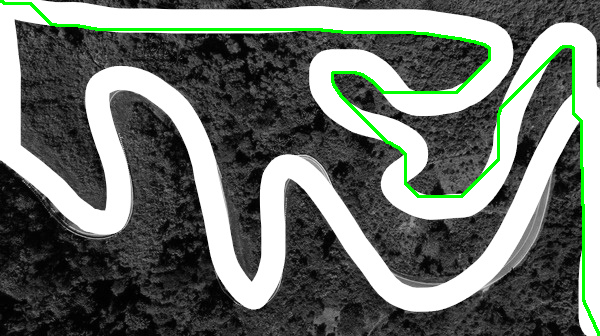

In [ ]:
import cv2
import numpy as np
import heapq
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# A* algorithm with diagonal movement and Euclidean distance
def astar(grid, start, goal):
    def heuristic(a, b):
        return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)  # Euclidean distance

    # Priority queue to hold nodes to explore
    open_set = []
    heapq.heappush(open_set, (0, start))

    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:
            return reconstruct_path(came_from, current)

        for neighbor in get_neighbors(grid, current):
            tentative_g_score = g_score[current] + heuristic(current, neighbor)

            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None  # No path found

# Reconstruct the shortest path
def reconstruct_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    return path[::-1]

# Function to get valid neighbors of a cell, including diagonal movement
def get_neighbors(grid, node):
    neighbors = []
    x, y = node
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]:  # Diagonal moves included
        nx, ny = x + dx, y + dy
        if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1] and grid[nx, ny] == 1:
            neighbors.append((nx, ny))
    return neighbors

# Function to visualize the path on the original grayscale image
def visualize_path(image_path, path, output_path="output_path_image.jpg"):
    # Load the grayscale image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print("Error: Image not loaded. Please check the file path.")
        return

    # Convert image to BGR for color visualization
    img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    # Draw the path on the image (in green)
    for i in range(len(path) - 1):
        current_point = (path[i][1], path[i][0])  # (x, y)
        next_point = (path[i + 1][1], path[i + 1][0])
        cv2.line(img_color, current_point, next_point, (0, 255, 0), 2)  # Green color for path

    # Save and display the image with the path
    cv2.imwrite(output_path, img_color)
    cv2_imshow(img_color)

# Example of how to use the functions
# Path to your grayscale image
image_path = input_image_path

# Step 1: Convert grayscale image to binary grid
def convert_image_to_grid(image_path, threshold_value=127):
    gray_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if gray_img is None:
        print("Error: Image not loaded. Please check the file path.")
        return None

    _, binary_img = cv2.threshold(gray_img, threshold_value, 255, cv2.THRESH_BINARY)
    grid = (binary_img == 255).astype(int)  # White pixels -> 1, Black pixels -> 0
    return grid

grid = convert_image_to_grid(image_path)

# Step 2: Define start and goal points on the grid
start = (0, 0)  # Starting point (row, col)
goal = (grid.shape[0] - 1, grid.shape[1] - 1)  # Goal point near bottom-right corner

# Step 3: Apply A* to find the shortest path
path = astar(grid, start, goal)

print(len(grid.shape))

if path:
    print("Shortest path found:", path)

    # Step 4: Visualize the extracted path on the original image
    visualize_path(image_path, path)
else:
    print("No path found.")


In [ ]:
pip install matplotlib

Streaming output truncated to the last 5000 lines.
Target: [191. 582.], Position: [190.34523 581.9999 ], Orientation: -3.174588689987098e-05
vx: 0.68, omega: -0.00
Target: [191. 582.], Position: [190.41316 581.9999 ], Orientation: -4.638394369862824e-05
vx: 0.65, omega: -0.00
Target: [191. 582.], Position: [190.47826 581.9999 ], Orientation: -6.0086080462709135e-05
vx: 0.59, omega: -0.00
Target: [191. 582.], Position: [190.53741 581.9999 ], Orientation: -6.472925410193483e-05
vx: 0.54, omega: 0.00
Target: [191. 582.], Position: [190.59184 581.9999 ], Orientation: -6.298470212104417e-05
vx: 0.50, omega: 0.00
Target: [191. 582.], Position: [190.64177 581.9999 ], Orientation: -5.4231909634796865e-05
vx: 0.46, omega: 0.00
Target: [191. 582.], Position: [190.6876 581.9999], Orientation: -3.840377566208673e-05
vx: 0.42, omega: 0.00
Target: [191. 582.], Position: [190.72968 581.9999 ], Orientation: -1.4849262364568025e-05
vx: 0.39, omega: 0.00
Target: [191. 582.], Position: [190.7683 581.9999

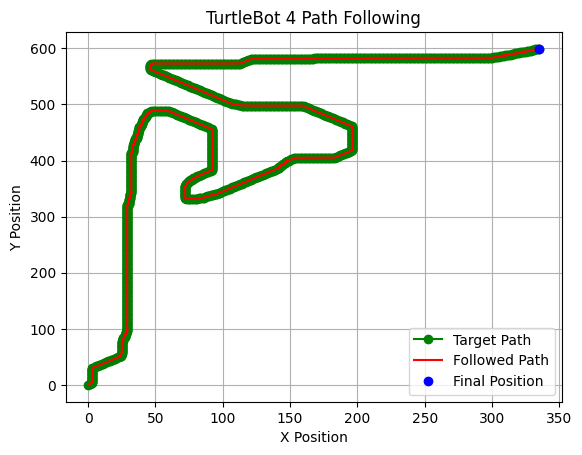

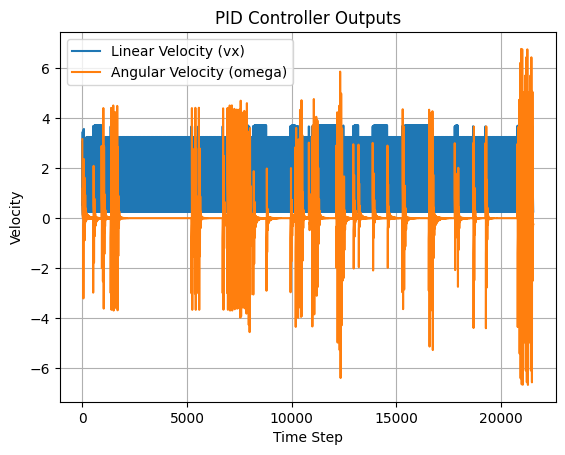

In [ ]:
#plot velocities

import numpy as np
import matplotlib.pyplot as plt

class PIDController:
    def __init__(self, kp, ki, kd, dt=0.1, integral_limit=10.0, derivative_limit=10.0):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.dt = dt
        self.integral = 0
        self.prev_error = 0
        self.integral_limit = integral_limit
        self.derivative_limit = derivative_limit

    def update(self, error):
        # Compute integral with limits to avoid overflow
        self.integral += error * self.dt
        self.integral = np.clip(self.integral, -self.integral_limit, self.integral_limit)

        # Compute derivative with limits
        derivative = (error - self.prev_error) / self.dt
        derivative = np.clip(derivative, -self.derivative_limit, self.derivative_limit)

        # Compute output
        output = self.kp * error + self.ki * self.integral + self.kd * derivative
        self.prev_error = error

        # Avoid NaN or inf outputs
        if np.isnan(output) or np.isinf(output):
            output = 0

        return output

class TurtleBotController:
    def __init__(self, path, kp_linear=1.0, ki_linear=0.02, kd_linear=0.2, kp_angular=2.0, ki_angular=0.15, kd_angular=0.2, dt=0.1):
        self.path = path
        self.dt = dt
        self.linear_pid = PIDController(kp_linear, ki_linear, kd_linear, dt)
        self.angular_pid = PIDController(kp_angular, ki_angular, kd_angular, dt)
        self.position = np.array(path[0], dtype=np.float32)
        self.orientation = 0.0  # Initial orientation angle (radians)
        self.followed_path = []  # Store all positions for final plotting
        self.vx_log = []  # Store vx values
        self.omega_log = []  # Store omega values

    def follow_path(self):
        for target in self.path[1:]:
            target = np.array(target, dtype=np.float32)

            while True:
                # Calculate position error
                error_vector = target - self.position
                distance_error = np.linalg.norm(error_vector)

                # Break if close enough to the target point
                if distance_error < 0.1:
                    break

                # Calculate target angle and angular error
                target_angle = np.arctan2(error_vector[1], error_vector[0])
                angular_error = target_angle - self.orientation
                angular_error = (angular_error + np.pi) % (2 * np.pi) - np.pi  # Normalize between -pi and pi

                # Calculate control outputs
                vx = self.linear_pid.update(distance_error)  # Linear velocity
                omega = self.angular_pid.update(angular_error)  # Angular velocity

                # Visualization or logging
                print(f"Target: {target}, Position: {self.position}, Orientation: {self.orientation}")
                print(f"vx: {vx:.2f}, omega: {omega:.2f}")

                # Log vx and omega values
                self.vx_log.append(vx)
                self.omega_log.append(omega)

                # Update position and orientation
                self.orientation += omega * self.dt
                self.position[0] += vx * np.cos(self.orientation) * self.dt
                self.position[1] += vx * np.sin(self.orientation) * self.dt

                # Avoid storing NaN values
                if not (np.isnan(self.position[0]) or np.isnan(self.position[1])):
                    self.followed_path.append((self.position[0], self.position[1]))

        # Plot the path at the end
        self.plot_path()
        self.plot_velocity_logs()  # Plot vx and omega logs

    def plot_path(self):
        # Extract followed path coordinates
        x_followed, y_followed = zip(*self.followed_path)

        # Extract target path coordinates
        x_targets, y_targets = zip(*self.path)

        # Plot the followed path and target points
        plt.figure()
        plt.plot(x_targets, y_targets, 'go-', label="Target Path")  # Target path in green
        plt.plot(x_followed, y_followed, 'r-', label="Followed Path")  # Followed path in red
        plt.plot(x_followed[-1], y_followed[-1], 'bo', label="Final Position")  # Mark final position in blue
        plt.xlabel("X Position")
        plt.ylabel("Y Position")
        plt.title("TurtleBot 4 Path Following")
        plt.legend()
        plt.grid()
        plt.show()

    def plot_velocity_logs(self):
        # Plot vx and omega over time
        plt.figure()
        plt.plot(self.vx_log, label="Linear Velocity (vx)")
        plt.plot(self.omega_log, label="Angular Velocity (omega)")
        plt.xlabel("Time Step")
        plt.ylabel("Velocity")
        plt.title("PID Controller Outputs")
        plt.legend()
        plt.grid()
        plt.show()


# Create the TurtleBot controller with the path
controller = TurtleBotController(path)
controller.follow_path()
